# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [1]:
import numpy as np

In [32]:
# устройство 1, 2, 3 предприятия P(Ai)
P_A1 = 0.2
P_A2 = 0.3
P_A3 = 0.5

# продукции 1, 2, 3 предприятия высшего сорта P(H/Ai)
P_H_A1 = 0.1
P_H_A2 = 0.05
P_H_A3 = 0.2

# формула полной вероятности
P = P_H_A1*P_A1 + P_H_A2*P_A2 + P_H_A3*P_A3
print(f'Вероятность того, что случайно купленная новая продукция окажется высшего сорта - {P*100:.2f}%')

Вероятность того, что случайно купленная новая продукция окажется высшего сорта - 13.50%


### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [72]:
# количество возможных исходов
outcomes = list(product(['Орел', 'Решка'], repeat=3))
outcomes

[('Орел', 'Орел', 'Орел'),
 ('Орел', 'Орел', 'Решка'),
 ('Орел', 'Решка', 'Орел'),
 ('Орел', 'Решка', 'Решка'),
 ('Решка', 'Орел', 'Орел'),
 ('Решка', 'Орел', 'Решка'),
 ('Решка', 'Решка', 'Орел'),
 ('Решка', 'Решка', 'Решка')]

In [73]:
# общее количество исходов
total = len(outcomes)
total

8

In [74]:
def A1(outcome):
    return outcome[0] == outcome[1] # монеты 1 и 2 упали одной и той же стороной

def A2(outcome):
    return outcome[1] == outcome[2] # монеты 2 и 3 упали одной и той же стороной

def A3(outcome):
    return outcome[0] == outcome[2] # монеты 1 и 3 упали одной и той же стороной

In [76]:
# события происходят независимо
even1 = sum(A1(outcome) for outcome in outcomes)
even2 = sum(A2(outcome) for outcome in outcomes)
even3 = sum(A3(outcome) for outcome in outcomes)
P_even1 = even1/total
P_even2 = even2/total
P_even3 = even3/total
print(f'Количество исходов каждого события: even1 - {even1}, even2 - {even2}, even3 - {even3}')
print(f'Вероятность натупления события: P_even1 - {P_even1}, P_even2 - {P_even2}, P_even3 - {P_even3}')

Количество исходов каждого события: even1 - 4, even2 - 4, even3 - 4
Вероятность натупления события: P_even1 - 0.5, P_even2 - 0.5, P_even3 - 0.5


In [77]:
# события происходят в совокупности
even12 = sum(A1(outcome) and A2(outcome) for outcome in outcomes)
even23 = sum(A2(outcome) and A3(outcome) for outcome in outcomes)
even13 = sum(A1(outcome) and A3(outcome) for outcome in outcomes)
P_even12 = even12/total
P_even23 = even23/total
P_even13 = even13/total
print(f'При одновременном наступлении событий количество исходов: even12 - {even12}, even23 - {even23}, even13 - {even13}')
print(f'Вероятность натупления события: P_even12 - {P_even12}, P_even23 - {P_even23}, P_even13 - {P_even13}')

При одновременном наступлении событий количество исходов: even12 - 2, even23 - 2, even13 - 2
Вероятность натупления события: P_even12 - 0.25, P_even23 - 0.25, P_even13 - 0.25


In [65]:
if P_even12 == P_even1*P_even2 and P_even23 == P_even2*P_even3 and P_even13 == P_even1*P_even3:
    print('События попарно независимы')

События попарно независимы


In [78]:
even123 = sum(A1(outcome) and A2(outcome) and A3(outcome) for outcome in outcomes)
P_even123 = even123/total
print(f'При одновременном наступлении событий количество исходов: even123 - {even123}')
print(f'Вероятность натупления события: P_even123 - {P_even123}')

При одновременном наступлении событий количество исходов: even123 - 2
Вероятность натупления события: P_even123 - 0.25


In [80]:
P_even1*P_even2*P_even3

0.125

In [79]:
if P_even123 == P_even1*P_even2*P_even3:
    print('События независимы в совокупности')
else:
    print('События зависимы в совокупности')

События зависимы в совокупности


## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t

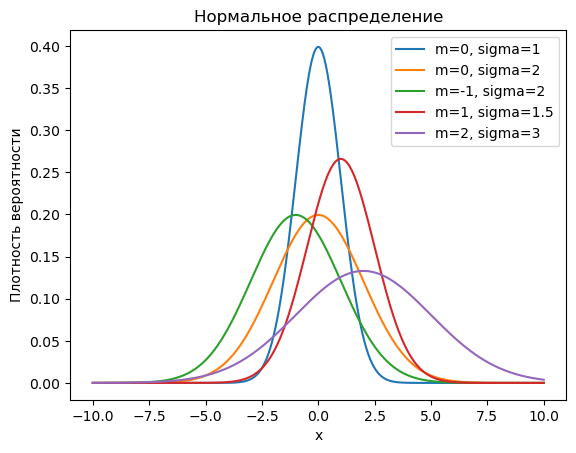

In [65]:
x = np.linspace(-10, 10, 1000)

params = [[0,1], [0,2], [-1,2], [1,1.5], [2,3]]
for loc, scale in params:
    normal_distribution = norm(loc, scale)
    
    pdf_ = normal_distribution.pdf(x)

    # визуализация
    plt.plot(x, pdf_, label=f'm={loc}, sigma={scale}')
plt.title('Нормальное распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

### Графики распределения имеют колоколообразную форму. Для сдвига и масштабирования варьируем параметрами m и sigma. Среднее значение m отвечает за положение центра на оси X, при m > 0 распределение смещается вправо на величину m, при m < 0 - влево. Стандартное отклонение sigma отвечает за ширину и высоту графика, чем меньше sigma, тем выше и уже график, чем больше sigma, тем ниже и шире, то есть на более удаленном расстоянии от среднего значения.

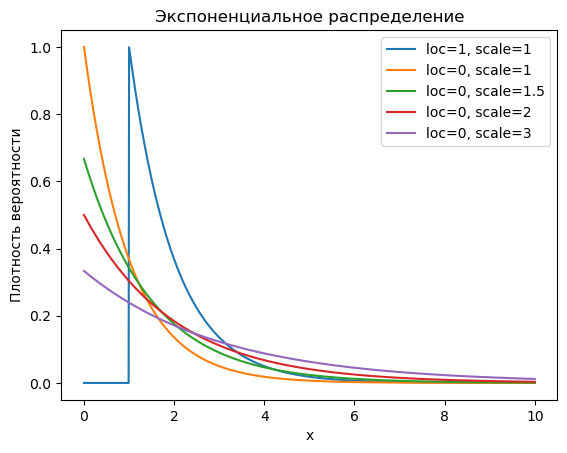

In [105]:
x = np.linspace(0, 10, 1000)

params = [[1,1], [0,1], [0,1.5], [0,2], [0,3]]
for loc, scale in params:
    expon_distribution = expon(loc, scale)
    
    pdf_ = expon_distribution.pdf(x)

    # визуализация
    plt.plot(x, pdf_, label=f'loc={loc}, scale={scale}')
plt.title('Экспоненциальное распределение')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

### loc отвечает за местоположение - по умолчанию 0, при loc отличном от 0 происходит смещение по оси X. scale отвечает за масштаб - меньшие значения приводят к более крутым графикам, большие значения приводят к более пологим графикам с большей вариативностью при увеличении значения по оси X. 

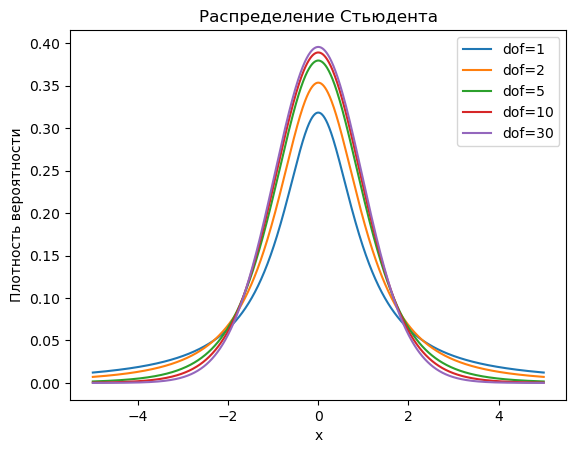

In [66]:
x = np.linspace(-5, 5, 1000)

dsof = [1, 2, 5, 10, 30] # число степеней свободы
for dof in dsof:
    pdf_ = t.pdf(x, dof)

    # визуализация
    plt.plot(x, pdf_, label=f'dof={dof}')
plt.title('Распределение Стьюдента')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

### График распределения имеет колоколообразную форму и симметричен относительно нуля. При малых значениях dof график более широкий, при больших значениях dof график становится уже и похож на нормальное распределение.